# Plotting Assignment

The goal of this assingment is to explore different binning strategies. In particularly, you will be trying out the following two techniques:

1) Scott's approach: https://www.dropbox.com/s/bmwilffmnbg944q/Histogram%20Bin%20Size.pdf?dl=0, for complete details see: https://www.dropbox.com/s/b2ysvul9dvcwrlb/histo-bin-size-scott.pdf?dl=0 

2) Hogg's approach:  https://www.dropbox.com/s/qzufwakwubb0nsm/0807.4820.pdf?dl=0

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
n, p = 100, .5
s1 = np.random.binomial(n, p, 10000)
n, p = 100, .3
s2 = np.random.binomial(n, p, 30000)
data=np.append(s1,s2)

(array([    81.,   2143.,  11524.,  11474.,   4743.,   2466.,   3743.,
          3104.,    691.,     31.]),
 array([ 12. ,  17.7,  23.4,  29.1,  34.8,  40.5,  46.2,  51.9,  57.6,
         63.3,  69. ]),
 <a list of 10 Patch objects>)

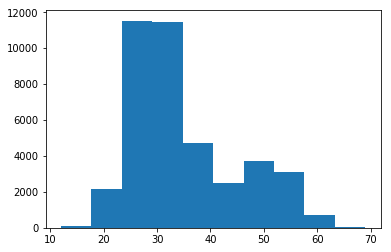

In [72]:
plt.hist(data)

(array([  1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+01,   1.80000000e+01,   4.80000000e+01,
          7.50000000e+01,   1.17000000e+02,   2.20000000e+02,
          3.48000000e+02,   5.76000000e+02,   8.07000000e+02,
          1.13900000e+03,   1.49100000e+03,   1.77700000e+03,
          2.09300000e+03,   2.46000000e+03,   2.56400000e+03,
          2.72600000e+03,   2.57800000e+03,   2.31700000e+03,
          2.08800000e+03,   1.76500000e+03,   1.42800000e+03,
          1.06300000e+03,   8.18000000e+02,   6.29000000e+02,
          4.69000000e+02,   3.36000000e+02,   2.81000000e+02,
          3.19000000e+02,   3.42000000e+02,   4.45000000e+02,
          4.96000000e+02,   5.83000000e+02,   6.78000000e+02,
          7.00000000e+02,   7.91000000e+02,   8.49000000e+02,
          7.25000000e+02,   7.36000000e+02,   6.40000000e+02,
          5.94000000e+02,   4.77000000e+02,   3.71000000e+02,
          2.86000000e+02,   2.34000000e+02,   1.74000000e+02,
        

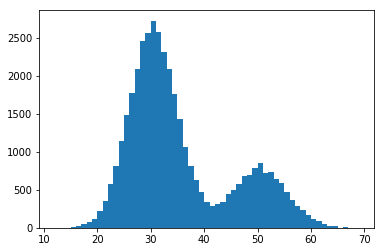

In [73]:
binwidth=1
plt.hist(data, bins=range(min(data), max(data)+binwidth, binwidth))

(array([   841.,  18211.,  11194.,   5928.,   3719.,    107.]),
 array([12, 22, 32, 42, 52, 62, 72]),
 <a list of 6 Patch objects>)

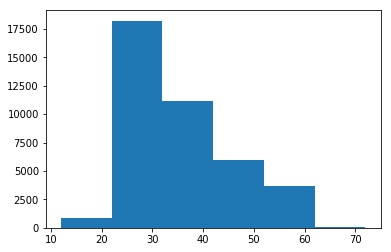

In [74]:
binwidth=10
plt.hist(data, bins=range(min(data), max(data)+binwidth, binwidth))

## Task 1: Generate histograms such as the ones above using Scott's approach.

(array([  2.00000000e+00,   3.00000000e+00,   1.00000000e+01,
          1.80000000e+01,   4.80000000e+01,   7.50000000e+01,
          1.17000000e+02,   2.20000000e+02,   3.48000000e+02,
          5.76000000e+02,   8.07000000e+02,   1.13900000e+03,
          1.49100000e+03,   1.77700000e+03,   2.09300000e+03,
          2.46000000e+03,   2.56400000e+03,   2.72600000e+03,
          2.57800000e+03,   2.31700000e+03,   2.08800000e+03,
          1.76500000e+03,   1.42800000e+03,   1.06300000e+03,
          8.18000000e+02,   6.29000000e+02,   4.69000000e+02,
          3.36000000e+02,   2.81000000e+02,   3.19000000e+02,
          3.42000000e+02,   4.45000000e+02,   4.96000000e+02,
          5.83000000e+02,   6.78000000e+02,   7.00000000e+02,
          7.91000000e+02,   8.49000000e+02,   7.25000000e+02,
          7.36000000e+02,   6.40000000e+02,   5.94000000e+02,
          4.77000000e+02,   3.71000000e+02,   2.86000000e+02,
          2.34000000e+02,   1.74000000e+02,   1.20000000e+02,
        

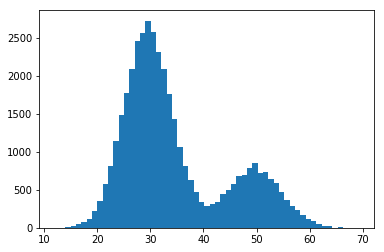

In [75]:
std = np.std(data)
binwidth = 3.49*std*data.size**(-1/3)
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

----

## Task 2: Generate histograms such as the ones above using Hogg's approach. Essentially, you should implement the procedure used for the 1D example in Section 4 of the manuscript.

In [76]:
def jlikelihood(data,N,alpha):
    hist = np.histogram(data,bins=N)
    binwidth = (np.max(data)-np.min(data))/N
    ln_deno = binwidth*((hist[0]+alpha).sum()-1)
    ln_num = hist[0]+alpha-1
    return (hist[0]*(np.log(ln_num)-np.log(ln_deno))).sum()

-32658.5588984
1009


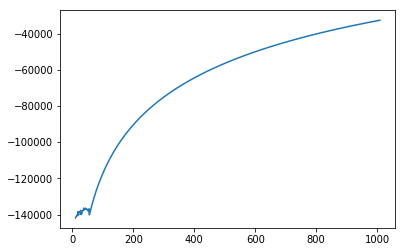

In [77]:
tmp = np.zeros(1000)
for i in range(10,len(tmp)+10):
    tmp[i-10] = jlikelihood(data,i,10)
print(np.nanmax(tmp))
print(np.nanargmax(tmp)+10)
plt.plot(np.arange(10,len(tmp)+10),tmp)

-136440.905308
37


D:\WinPython-64bit-3.5.4.1Qt5\python-3.5.4.amd64\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
D:\WinPython-64bit-3.5.4.1Qt5\python-3.5.4.amd64\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


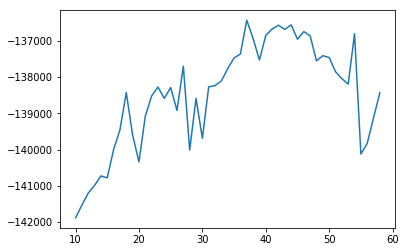

In [78]:
tmp = np.zeros(100)
for i in range(10,len(tmp)+10):
    tmp[i-10] = jlikelihood(data,i,1)
print(np.nanmax(tmp))
print(np.nanargmax(tmp)+10)
plt.plot(np.arange(10,len(tmp)+10),tmp)

D:\WinPython-64bit-3.5.4.1Qt5\python-3.5.4.amd64\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


-136441.853763
37


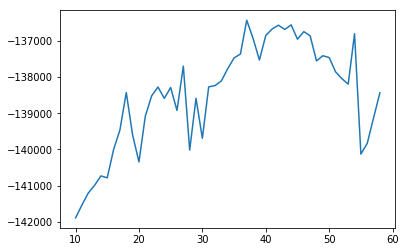

In [79]:
tmp = np.zeros(100)
for i in range(10,len(tmp)+10):
    tmp[i-10] = jlikelihood(data,i,0.1)
print(np.nanmax(tmp))
print(np.nanargmax(tmp)+10)
plt.plot(np.arange(10,len(tmp)+10),tmp)

-136442.093983
37


D:\WinPython-64bit-3.5.4.1Qt5\python-3.5.4.amd64\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


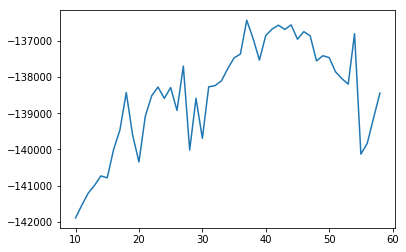

In [80]:
tmp = np.zeros(100)
for i in range(10,len(tmp)+10):
    tmp[i-10] = jlikelihood(data,i,0.01)
print(np.nanmax(tmp))
print(np.nanargmax(tmp)+10)
plt.plot(np.arange(10,len(tmp)+10),tmp)

(array([  2.00000000e+00,   1.30000000e+01,   1.80000000e+01,
          1.23000000e+02,   1.17000000e+02,   5.68000000e+02,
          5.76000000e+02,   1.94600000e+03,   1.49100000e+03,
          3.87000000e+03,   2.46000000e+03,   5.29000000e+03,
          4.89500000e+03,   2.08800000e+03,   3.19300000e+03,
          1.06300000e+03,   1.44700000e+03,   4.69000000e+02,
          6.17000000e+02,   3.19000000e+02,   7.87000000e+02,
          4.96000000e+02,   1.26100000e+03,   7.00000000e+02,
          1.64000000e+03,   1.46100000e+03,   6.40000000e+02,
          1.07100000e+03,   3.71000000e+02,   5.20000000e+02,
          1.74000000e+02,   2.07000000e+02,   4.80000000e+01,
          4.80000000e+01,   3.00000000e+00,   6.00000000e+00,
          2.00000000e+00]),
 array([ 12.        ,  13.54054054,  15.08108108,  16.62162162,
         18.16216216,  19.7027027 ,  21.24324324,  22.78378378,
         24.32432432,  25.86486486,  27.40540541,  28.94594595,
         30.48648649,  32.02702703, 

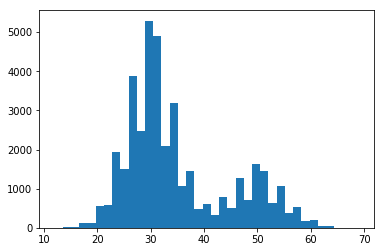

In [81]:
plt.hist(data,bins=37)